# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

# Loading Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preprocessing

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

Text(0, 0.5, 'Target')

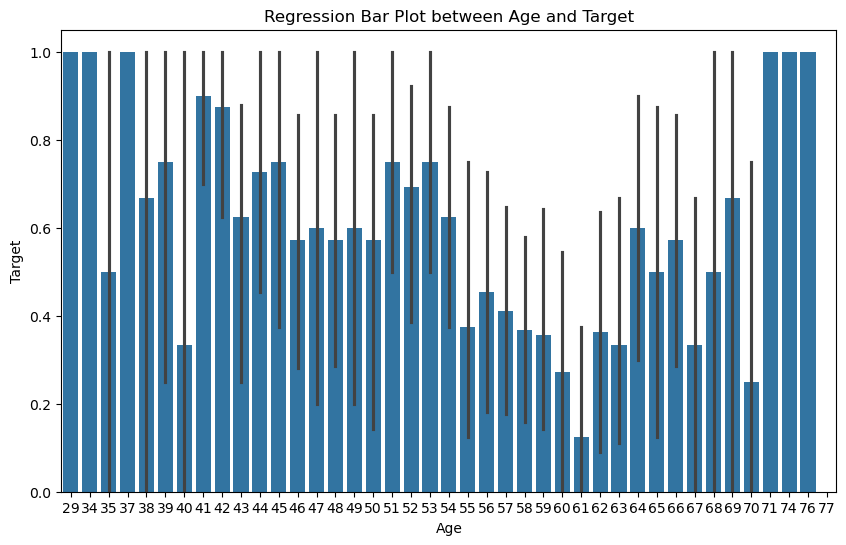

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'age', y = 'target', data = df)
plt.title('Regression Bar Plot between Age and Target')
plt.xlabel('Age')
plt.ylabel('Target')


(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

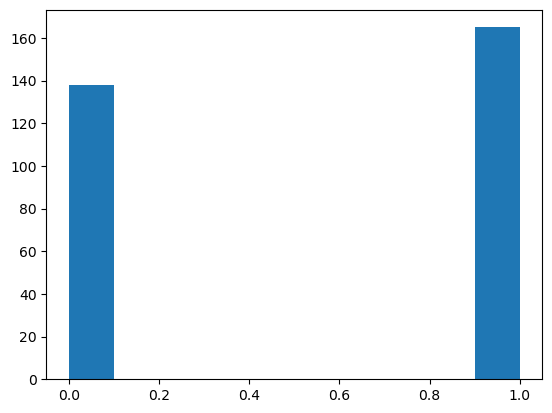

In [8]:
plt.hist(df['target'])

Text(0, 0.5, 'RestingHeartBeat')

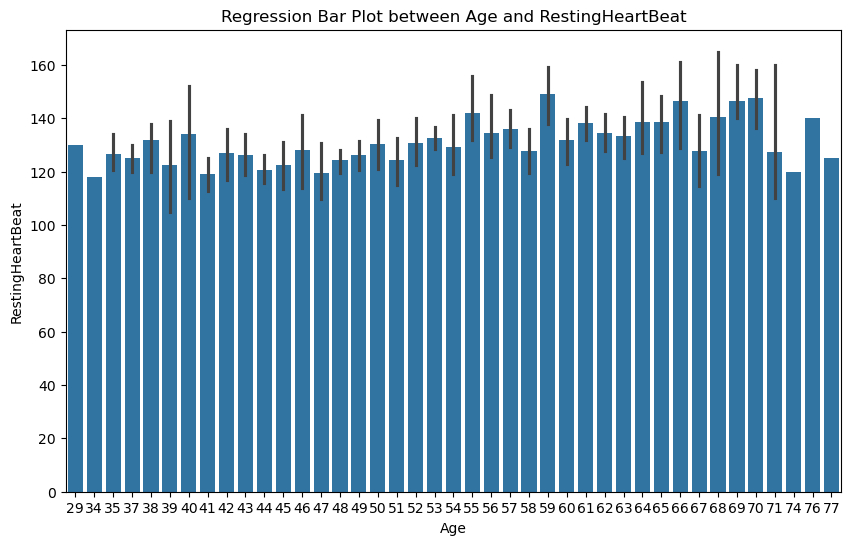

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'age', y = 'trestbps', data = df)
plt.title('Regression Bar Plot between Age and RestingHeartBeat')
plt.xlabel('Age')
plt.ylabel('RestingHeartBeat')


Text(0, 0.5, 'Target')

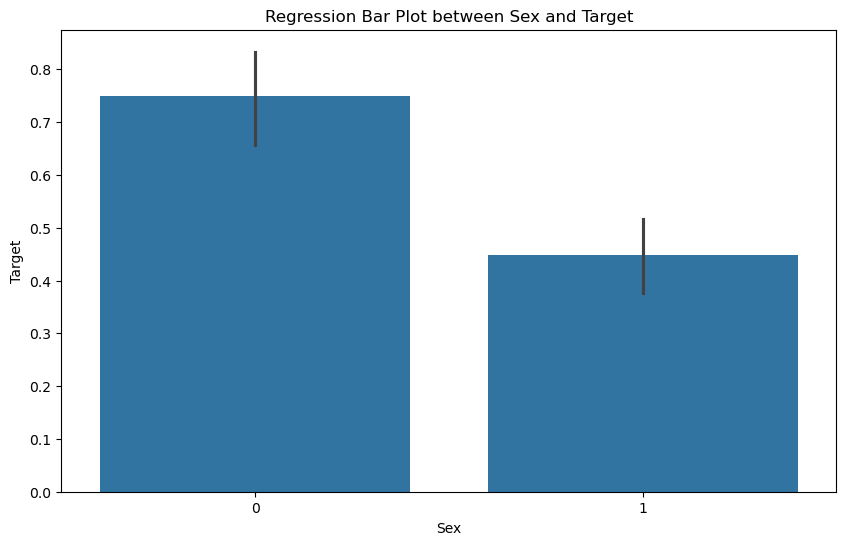

In [10]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'sex', y = 'target', data = df)
plt.title('Regression Bar Plot between Sex and Target')
plt.xlabel('Sex')
plt.ylabel('Target')


# Splitting Data

In [11]:
X = df.drop(columns = 'target')
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape

(242, 13)

In [14]:
X_test.shape

(61, 13)

**Fitting Model**

In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Making prediction**

In [17]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

*Checking Accuracy Score**

In [18]:
print("Accuracy Score on Training Set: ", accuracy_score(y_train_pred, y_train))
print("Accuracy Score on Test Set: ", accuracy_score(y_pred, y_test))

Accuracy Score on Training Set:  0.8636363636363636
Accuracy Score on Test Set:  0.8852459016393442


# Importing Original DataSet

In [19]:
# import os
# import urllib.request
# import pandas as pd

# def download_uciml_dataset(url, dataset_name):
#     # Create a directory for the dataset
#     os.makedirs(os.path.expanduser(f'~/uci_datasets/{dataset_name}'), exist_ok=True)
#     dataset_path = os.path.expanduser(f'~/uci_datasets/{dataset_name}')

#     # Download the dataset
#     file_name = url.split('/')[-1]
#     full_path = os.path.join(dataset_path, file_name)
#     urllib.request.urlretrieve(url, full_path)
#     print(f"Downloaded {file_name} to {dataset_path}")

#     return full_path

# def convert_to_csv(file_path, column_names=None):
#     # Load the dataset into a DataFrame
#     df = pd.read_csv(file_path, names=column_names)
    
#     # Define CSV file path
#     csv_file_path = file_path.replace('.data', '.csv')
    
#     # Save the dataset as a CSV file
#     df.to_csv(csv_file_path, index=False)
#     print(f"Dataset converted to CSV and saved as '{csv_file_path}'")

    
# dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
# column_names = ['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
#                 'ca', 'thal', 'target']
# dataset_name = 'heart'

# # Download and convert the dataset
# file_path = download_uciml_dataset(dataset_url, dataset_name)
# convert_to_csv(file_path, column_names)
